# Sprint 1

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data inlezen
complaints = pd.read_csv("data/complaints.csv")

In [55]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


In [33]:
#info van dataframe tonen
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485701 entries, 0 to 485700
Data columns (total 18 columns):
Date received                   485701 non-null object
Product                         485701 non-null object
Sub-product                     485701 non-null object
Issue                           485701 non-null object
Sub-issue                       485701 non-null object
Consumer complaint narrative    485701 non-null object
Company public response         485701 non-null object
Company                         485701 non-null object
State                           485701 non-null object
ZIP code                        485701 non-null object
Tags                            485701 non-null object
Consumer consent provided?      485701 non-null object
Submitted via                   485701 non-null object
Date sent to company            485701 non-null object
Company response to consumer    485701 non-null object
Timely response?                485701 non-null object
Consumer 

In [41]:
#nieuwe dataframa maken met enkel issue en sub-issue kolommen
issues = complaints[['Issue','Sub-issue']].copy()
issues.head()

,Issue,Sub-issue
0,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...
1,False statements or representation,Attempted to collect wrong amount
2,Attempts to collect debt not owed,Debt was paid
3,Attempts to collect debt not owed,Debt was result of identity theft
4,Improper use of your report,Received unsolicited financial product or insu...


In [42]:
#id toewijzen aan issue en sub-issue
issues['Issue_Id'] = issues['Issue'].factorize()[0]
issues['Subissue_id'] = issues['Sub-issue'].factorize()[0]
issues.head()

,Issue,Sub-issue,Issue_Id,Subissue_id
0,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,0,0
1,False statements or representation,Attempted to collect wrong amount,1,1
2,Attempts to collect debt not owed,Debt was paid,2,2
3,Attempts to collect debt not owed,Debt was result of identity theft,2,3
4,Improper use of your report,Received unsolicited financial product or insu...,3,4


In [47]:
#issues groeperen en tellen
issue_counts = issues.groupby('Issue')['Issue'].count()
issue_counts.sort_values(ascending=False)

Issue
Incorrect information on your report                                                77776
Problem with a credit reporting company's investigation into an existing problem    38424
Attempts to collect debt not owed                                                   28629
Incorrect information on credit report                                              21217
Improper use of your report                                                         20239
                                                                                    ...  
Property was sold                                                                       3
Property was damaged or destroyed property                                              2
Problem with an overdraft                                                               2
Lender damaged or destroyed vehicle                                                     2
Lender damaged or destroyed property                                                    1
Name

In [53]:
#subissues groeperen en tellen
subissue_counts = issues.groupby('Sub-issue')['Sub-issue'].count()
subissue_counts.sort_values(ascending=False)

Sub-issue
None                                                           127292
Information belongs to someone else                             32324
Their investigation did not fix an error on your report         27541
Account status incorrect                                        15559
Account information incorrect                                   15060
                                                                ...  
Qualified for a better loan than the one offered                    8
Threatened to turn you in to immigration or deport you              8
Problem with a check written from your prepaid card account         6
Was signed up for overdraft on card, but don't want to be           3
Trouble using the card to send money to another person              2
Name: Sub-issue, Length: 217, dtype: int64

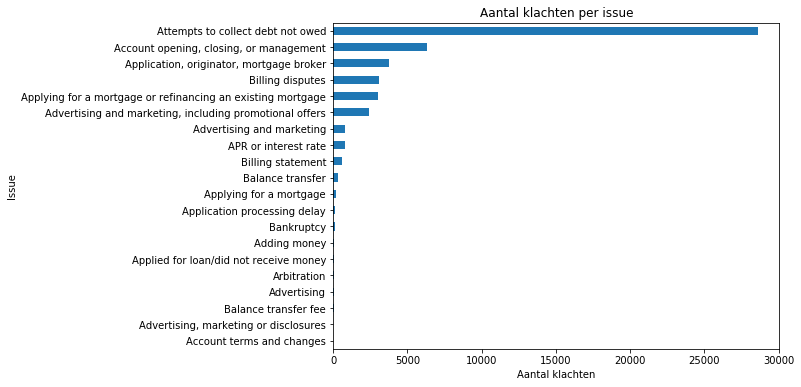

In [48]:
#20 meest voorkomende issues
fig = plt.figure(figsize=(8,6))
issue_counts.head(20).sort_values().plot.barh(ylim=0, title="Aantal klachten per issue")
plt.xlabel('Aantal klachten', fontsize = 10);

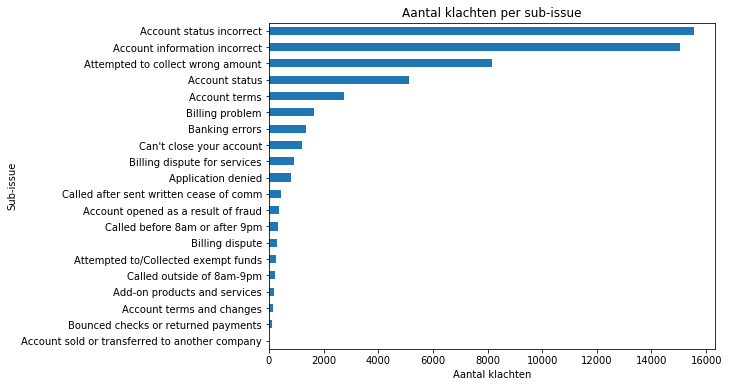

In [49]:
#20 meest voorkomende subissues
fig = plt.figure(figsize=(8,6))
subissue_counts.head(20).sort_values().plot.barh(ylim=0, title="Aantal klachten per sub-issue")
plt.xlabel('Aantal klachten', fontsize = 10);

In [57]:
#sns.catplot(x="Issue", y="Sub-issue", kind="swarm", data=issues);